In [25]:
import pandas as pd
iris = pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
iris.shape


(150, 5)

In [27]:
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


All four features are numeric, each with different ranges. There are no missing values in any of the columns. So it's clean dataset

In [28]:
iris.groupby('species').size()

#The data set contains 3 classes of 50 instances each.


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

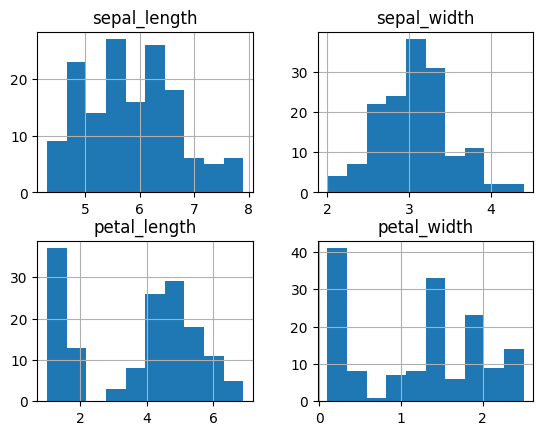

In [29]:
import matplotlib.pyplot as plt

iris.hist()
plt.show()

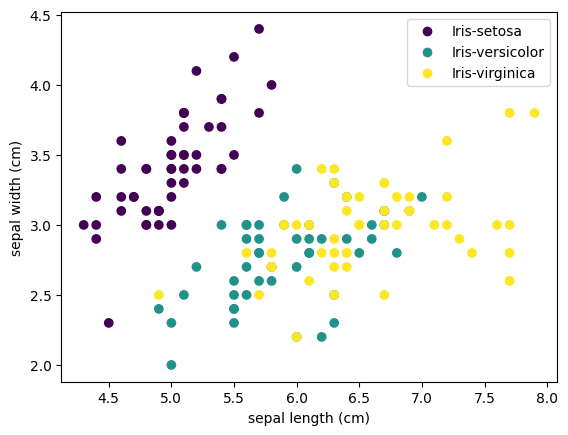

In [30]:
inv_name_dict = {'Iris-setosa': 0,
  'Iris-versicolor': 1,
  'Iris-virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']]
# scatter plot
scatter = plt.scatter(iris['sepal_length'], iris['sepal_width'], c = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
## add legend
plt.legend(handles=scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()

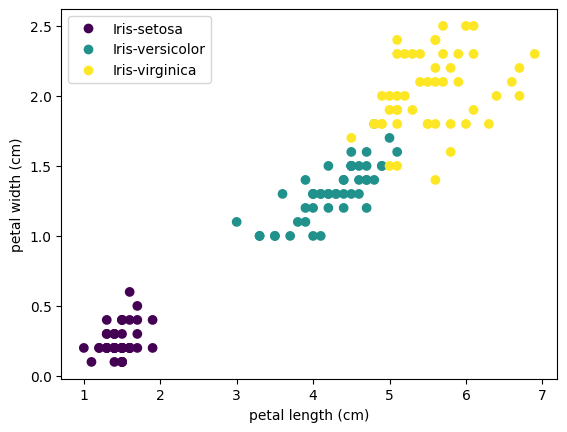

In [31]:
# scatter plot
scatter = plt.scatter(iris['petal_length'], iris['petal_width'],c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
# add legend
plt.legend(handles= scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()

In [7]:
X = iris[['petal_length', 'petal_width']]
y = iris['species']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [15]:
y_test.value_counts()

Iris-virginica     15
Iris-setosa        15
Iris-versicolor    15
Name: species, dtype: int64

In [16]:
y_train.value_counts()


Iris-setosa        35
Iris-virginica     35
Iris-versicolor    35
Name: species, dtype: int64

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
#metric = 'minkowski' and p = 2 together defines that the distance is euclidean distance

KNeighborsClassifier(n_neighbors=4)

In [25]:
pred = knn.predict(X_test)
pred[:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [26]:
knn.score(X_test, y_test)
#accuracy

0.9777777777777777

In [29]:
# Just Function

import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
def KNN(X_train, y_train, X_test, k):
    y_pred = []
    for x in X_test:
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        y_pred.append(most_common[0][0])
    return y_pred

y_pred = KNN(X_train.values, y_train.values, X_test.values, 3)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [19]:
#svm but only binary classificator :(
import pandas as pd
import numpy as np

df = iris
df['label'] = df['species'].apply(lambda x: -1 if x == 'Iris-setosa' else 1)

train_data = df.sample(frac=0.8, random_state=42)
test_data = df.drop(train_data.index)

X_train = train_data.drop(columns=['species', 'label']).to_numpy()
y_train = train_data['label'].to_numpy()

X_test = test_data.drop(columns=['species', 'label']).to_numpy()
y_test = test_data['label'].to_numpy()

def svm_sgd(X, y):
    w = np.zeros(X.shape[1])
    eta = 0.01
    epochs = 10000
    for epoch in range(1, epochs + 1):
        for i, x in enumerate(X):
            if (y[i] * np.dot(X[i], w)) < 1:
                w = w + eta * ((X[i] * y[i]) + (-2 * (1/epoch) * w))
            else:
                w = w + eta * (-2 * (1/epoch) * w)
    return w

w = svm_sgd(X_train, y_train)
def predict(w, X):
    return np.sign(np.dot(X, w))

predictions = predict(w, X_test)

accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%
